# Jay Jun Homework 2 #

In [9]:
import http
import requests
import pandas as pd
import matplotlib.pyplot as plt

# Part 1: Leverage the lecture code to answer these questions.

## 1. Use the BLS Data Finder 1.1 available here to import a BLS variable/field (using the BLS web API) of your choosing.

In [10]:
# BLS Series ID for Eggs, grade A, large, per dozen (U.S. city average)
series_id = "APU0000708111"

# Set headers and endpoint
headers = {'Content-type': 'application/json'}
bls_api_url = 'https://api.bls.gov/publicAPI/v2/timeseries/data/'

# Build the request payload (latest 10 years)
payload = {
    "seriesid": [series_id],
    "startyear": "2023",
    "endyear": "2025"
}

# Make request
response = requests.post(bls_api_url, json=payload, headers=headers)
data = response.json()

# Extract data into a flat list
series_data = data['Results']['series'][0]['data']

df_eggs = pd.DataFrame(series_data)
df_eggs['value'] = pd.to_numeric(df_eggs['value'])
df_eggs['date'] = pd.to_datetime(df_eggs['year'] + '-' + df_eggs['period'].str[1:] + '-01', errors='coerce')
df_eggs = df_eggs[['date', 'value']].sort_values('date')

# Show result
df_eggs.head()

,date,value
26,2023-01-01,4.823
25,2023-02-01,4.211
24,2023-03-01,3.446
23,2023-04-01,3.270
22,2023-05-01,2.666


In [11]:
base_url = "https://api.bls.gov/publicAPI/v2/timeseries/data/"
series_id = "CUUR0000SAM"  # Medical Care
title = "CPI: Medical Care"
df1 = get_bls_data(base_url, series_id, title)
print(df1.head())

NameError: name 'json' is not defined

## 2. Using the BLS web API, create your own custom function which can interact with the BLS web API. Your function should take three input parameters: name base_url_in, series_in, and title_in and return the relevant data series as a pd.DataFrame object. Test your function by replicating the GET request you sent above for #1.

In [19]:
def get_bls_series(base_url_in, series_in, title_in, start_year="2023", end_year="2025"):
    headers = {'Content-type': 'application/json'}

    payload = {
        "seriesid": series_in,
        "startyear": start_year,
        "endyear": end_year
    }
    response = requests.post(base_url_in, json=payload, headers=headers)
    data = response.json()
    
    # Extract and format series data
    series_data = data['Results']['series'][0]['data']
    df = pd.DataFrame(series_data)
    df['value'] = pd.to_numeric(df['value'], errors='coerce')
    df['date'] = pd.to_datetime(df['year'] + '-' + df['period'].str[1:] + '-01', errors='coerce')
    df = df[['date', 'value']].sort_values('date').reset_index(drop=True)
    df = df.rename(columns={'value': title_in})
    
    return df

In [21]:
#Testing the function by replicating the GET request
base_url = "https://api.bls.gov/publicAPI/v2/timeseries/data/"
series_id = ["APU0000708111"]
title = "Eggs (per dozen, U.S. avg)"

df_eggs_test = get_bls_series(base_url, series_id, title)

df_eggs_test.head()

,date,"Eggs (per dozen, U.S. avg)"
0,2023-01-01,4.823
1,2023-02-01,4.211
2,2023-03-01,3.446
3,2023-04-01,3.270
4,2023-05-01,2.666


## 3. Go to these three links: link1, link2, link3. On these webpages, you will see three different time series data sets. For each, you will also see both a Series Title and ID. Using the function you wrote to fetch data from the BLS web API, import these data sets into Python as three separate pd.Data.Frame objects.

In [36]:
# Base URL for BLS API
base_url = "https://api.bls.gov/publicAPI/v2/timeseries/data/"

#Milk prices
df_milk = get_bls_series(
    base_url_in=base_url,
    series_in=["APU0000709112"],
    title_in="Milk (per gallon)"
)

#Gasoline prices
df_gasoline = get_bls_series(
    base_url_in=base_url,
    series_in=["APU000074714"],
    title_in="Gasoline (per gallon)"
)

#Egg prices
df_eggs = get_bls_series(
    base_url_in=base_url,
    series_in=["APU0000708111"],
    title_in="Eggs (per dozen)"
)


In [38]:
#Looking at milk data
df_milk.head()

,date,Milk (per gallon)
0,2023-01-01,4.204
1,2023-02-01,4.163
2,2023-03-01,4.098
3,2023-04-01,4.042
4,2023-05-01,4.042


In [42]:
#Looking at gasoline data
df_gasoline.head()

,date,Gasoline (per gallon)
0,2023-01-01,3.452
1,2023-02-01,3.514
2,2023-03-01,3.551
3,2023-04-01,3.735
4,2023-05-01,3.685


In [44]:
#Looking at eggs data
df_eggs.head()

,date,Eggs (per dozen)
0,2023-01-01,4.823
1,2023-02-01,4.211
2,2023-03-01,3.446
3,2023-04-01,3.270
4,2023-05-01,2.666


## 3.Merge the data sets together into a single pd.DataFrame and make a time series plot showing how the CPI for these three goods has changed over the last 24 months. Each good should be shown as a unique line with different coloring/patterns and a matching legend (I suggest using the matplotlib library to do this).

In [49]:
# Merge milk, gasoline, and eggs on 'date'.'Chaining' merge.
df_merged = df_milk.merge(df_gasoline, on="date").merge(df_eggs, on="date")

# Keep only the last 24 months
df_last24 = df_merged.sort_values("date").tail(24).reset_index(drop=True)

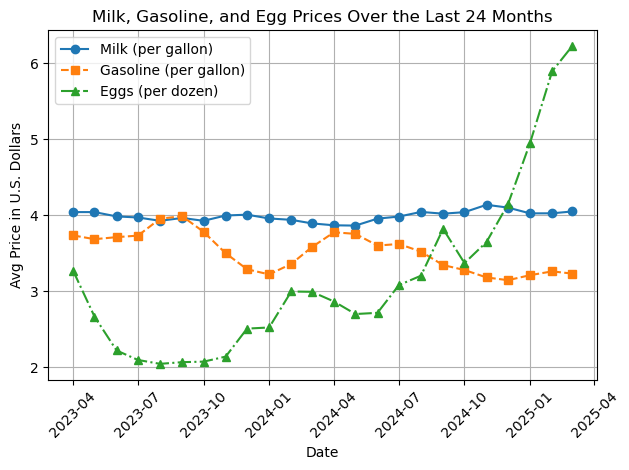

In [53]:
# Plot each series
plt.plot(df_last24['date'], df_last24['Milk (per gallon)'], label='Milk (per gallon)', linestyle='-', marker='o')
plt.plot(df_last24['date'], df_last24['Gasoline (per gallon)'], label='Gasoline (per gallon)', linestyle='--', marker='s')
plt.plot(df_last24['date'], df_last24['Eggs (per dozen)'], label='Eggs (per dozen)', linestyle='-.', marker='^')

# Add labels and formatting
plt.legend()
plt.xlabel("Date")
plt.ylabel("Avg Price in U.S. Dollars")
plt.title("Milk, Gasoline, and Egg Prices Over the Last 24 Months")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()

plt.show()

## 5. In the lecture notes, refer to the section entitled "No Python Package? Manipulate URL directly". Can you update the code in the New York Times article search API URL so that you return article data for Hillary Clinton for the time range April 1, 2024 - April 4, 2024? How many TOTAL articles were returned by this API search?

In [60]:
article_key = "7z0h7UUwSfh5nFGdAhx9dWMJ7bQVKZiz"  # Replace with your real key if needed
term = "Hillary+Clinton"  # use + for multi-word terms
begin_date = "20240401"
end_date = "20240404"

# Constructing the final URL
finalurl = (
    "https://api.nytimes.com/svc/search/v2/articlesearch.json"
    "?q=" + term +
    "&begin_date=" + begin_date +
    "&end_date=" + end_date +
    "&api-key=" + article_key
)

# Fetching and parsing the JSON data
r = requests.get(finalurl)
r = r.json()

# Converting 'docs' field to DataFrame
data = pd.DataFrame(r['response']['docs'])

# Viewing Results
print("Number of articles:", data.shape[0])

Number of articles: 5


# Part 2 Connect to other APIs

## 6. In this question, we will connect to the Spotify API. Spotify has a package called spotipy which makes this easy. Using their API documentation, your task is to figure out how to use the album function listed on this webpage to import Queen's Greatest Hits album. Once you have successfully used spotipy to pull in data for this album, write a for loop to display the following message, making sure you align the numbers as is done here:

In [69]:
#Installing spotipy
pip install spotipy

   ---------------------------------------- 0.0/261.5 kB ? eta -:--:--
   ---------------------------------------- 0.0/261.5 kB ? eta -:--:--
   ------ --------------------------------- 41.0/261.5 kB 1.9 MB/s eta 0:00:01
   ----------------------- ---------------- 153.6/261.5 kB 2.3 MB/s eta 0:00:01
   ---------------------------------------- 261.5/261.5 kB 2.3 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [2]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials

In [3]:
# Step 1: Authenticate
cid = '1d79c7320efe48be8555674d48a7fd2d'
secret = '34a7cabc5f624302b9bb25c29d1c8057'
client_credentials_manager = SpotifyClientCredentials(client_id=cid, client_secret=secret)
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)

# Step 2: Album ID for Queen's Greatest Hits
album_id = '6i6folBtxKV28WX3msQ4FE'

# Step 3: Fetch the album data
album_data = sp.album(album_id)
tracks = album_data['tracks']['items']

# Step 4: Print each track nicely
for idx, track in enumerate(tracks, start=1):
    print(f"Track {idx:2}  is {track['name']}")

Track  1  is 20th Century Fox Fanfare
Track  2  is Somebody To Love
Track  3  is Doing All Right - ...Revisited
Track  4  is Keep Yourself Alive - Live At The Rainbow
Track  5  is Killer Queen
Track  6  is Fat Bottomed Girls - Live In Paris
Track  7  is Bohemian Rhapsody
Track  8  is Now I'm Here - Live At The Hammersmith Odeon
Track  9  is Crazy Little Thing Called Love
Track 10  is Love Of My Life - Live At Rock In Rio
Track 11  is We Will Rock You - Movie Mix
Track 12  is Another One Bites The Dust
Track 13  is I Want To Break Free
Track 14  is Under Pressure
Track 15  is Who Wants To Live Forever
Track 16  is Bohemian Rhapsody - Live Aid
Track 17  is Radio Ga Ga - Live Aid
Track 18  is Ay-Oh - Live Aid
Track 19  is Hammer To Fall - Live Aid
Track 20  is We Are The Champions - Live Aid
Track 21  is Don't Stop Me Now - ...Revisited
Track 22  is The Show Must Go On


## 7. Find an API of interest to you. Sign up for an API key if necessary. Describe the API concisely and make a single call on the API and return an example of the returned data here

# This API comes from a website called Untapped.gg and pulls in data from the next generation real-time social strategy game 'Stormgate'. Untapped.gg provide public access to this data, and the data is not limited to player statistics, but shows match histories and other stat tracking data. The following data shows the best top 10 players in the 1v1 ranked mode in that game. Data shows the name of the player, the race they in game, there mmr (match making rating, points, and what league they are in). 

In [109]:
# Get top 500 players in ranked 1v1
url = "https://api.stormgate.untapped.gg/api/v1/leaderboard?match_mode=ranked_1v1"
response = requests.get(url)

# Parse JSON
data = response.json()

# Convert to DataFrame
df = pd.DataFrame(data)

# Show top 5 players
print(df[['playerName', 'race', 'mmr', 'points', 'league']].head(10))

                        playerName        race   mmr  points  league
0                    ZEROSUGARCOKE    vanguard  2432    2443  master
1  ThisSpaceIntentionallyLeftBlank   infernals  2435    2418  master
2                        gawr gura   infernals  2385    2413  master
3                          Andreas   infernals  2350    2349  master
4                             Mixu  celestials  2241    2347  master
5                             msrm   infernals  2297    2340  master
6                Silverpine Forest   infernals  2320    2339  master
7                    Ousmane Sonko   infernals  2320    2338  master
8                             ROFL    vanguard  2336    2326  master
9                   BANG BANG FIRE   infernals  2323    2318  master


## 8. Import the data found in the HW5 folder. It is a single column of data that has 500 rows. This data represents a format of data that you will often encounter in research projects which use "thematic coding" for text response data. As described here: "Thematic coding is a form of qualitative analysis that involves recording or identifying passages of text or images that are linked by a common theme or idea allowing you to index the text into categories and therefore establish a 'framework of thematic ideas about it' (Gibbs 2007)."

## It is ok if you are not familiar with thematic coding for qualitative/text data. Your task is to import the data and write a regex that is capable of finding the thematic code "1" whenever it appears in the string. This is more difficult than it sounds, because your regex should count all the "1"s that appear, but not "10", "11", "12", "21" etc. Also note, that sometimes "1" appears in the 2nd, 3rd... etc. position (e.g., "2, 6, 7, 1, 10"). Use this regex to add a new column to your dataset called "find_1". Display a frequency table showing the number of times your regex flagged "1" as appearing.

In [113]:
import re

In [125]:
df = pd.read_csv(r"C:\Users\jayxp\Downloads\Thematic codes data.csv")

# Define regex pattern to match standalone "1" (not part of 10, 11, and etc.)
pattern = r'(?<!\d)1(?!\d)'

# Apply regex to count all occurrences of standalone "1" in each row
df['find_1'] = df['Thematic codes'].apply(lambda x: len(re.findall(pattern, str(x))))

# Create binary indicator (0 = no "1" found, 1 = at least one "1" found)
df['has_1'] = df['find_1'].apply(lambda x: 1 if x > 0 else 0)

# Create and display a frequency table with your preferred labels
frequency_table = df['has_1'].value_counts().rename(index={0: 'No 1 Found', 1: '1 Found'})
print(frequency_table)

has_1
No 1 Found    437
1 Found        63
Name: count, dtype: int64
